In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def ANOVA(groups, alpha):
    group_mean = [np.mean(group) for group in groups]
    grand_mean = np.mean(group_mean)
    k = len(groups)
    N = sum([len(group) for group in groups])
    SSB = sum( len(group) * (group_mean[i] - grand_mean)**2 \
                for i, group in enumerate(groups) )
    SSW = sum( (x - group_mean[i])**2 \
                for i, group in enumerate(groups) for x in group )
    dfb = k - 1
    dfw = N - k
    MSB = SSB/dfb
    MSW = SSW/dfw
    F = MSB/MSW
    critical = stats.f.ppf(1-alpha, dfb, dfw)

    print("Critical Value =", critical)
    print("F Statistic =", F)
    if F > critical: 
        print("Reject Null Hypothesis")
    else:
        print("Accept Null Hypothesis")

    x = np.linspace(0, 6, 1000)
    y = stats.f.pdf(x, dfb, dfw)
    plt.figure(figsize = (10, 6))
    plt.plot(x, y, color = 'blue', label = 'F Distribution')
    plt.axvline(x = F, color = 'green', linestyle = '--', label = 'F Statistic')
    plt.fill_between(x, y, color = 'red', where = (x > critical), alpha = 0.5, label = 'Critical Region')

    plt.xlabel('F Score')
    plt.ylabel('Probability Density')
    plt.title('One Way ANOVA Test')
    plt.legend()
    plt.show()

<b>Implement Random Sampling, Demonstrate ANOVA. 
Is there a significant difference in the DiabetesPedigreeFunction levels between young adults (20-30), middle-aged adults (31-50), and older adults (50+) diagnosed with diabetes?
</b>

In [4]:
df = pd.read_csv('2_ANOVA.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
def categorize(age):
    if 20 <= age <= 30: return "young"
    elif 30 < age <= 50: return "middle-aged"
    elif 50 < age: return "old"

df['Age_Category'] = df['Age'].apply(categorize)
df[['DiabetesPedigreeFunction', 'Age', 'Age_Category']].head(10)

,DiabetesPedigreeFunction,Age,Age_Category
0,0.627,50,middle-aged
1,0.351,31,middle-aged
2,0.672,32,middle-aged
3,0.167,21,young
4,2.288,33,middle-aged
5,0.201,30,young
6,0.248,26,young
7,0.134,29,young
8,0.158,53,old
9,0.232,54,old


Critical Value = 3.057620651649394
F Statistic = 0.38807357175535756
Accept Null Hypothesis


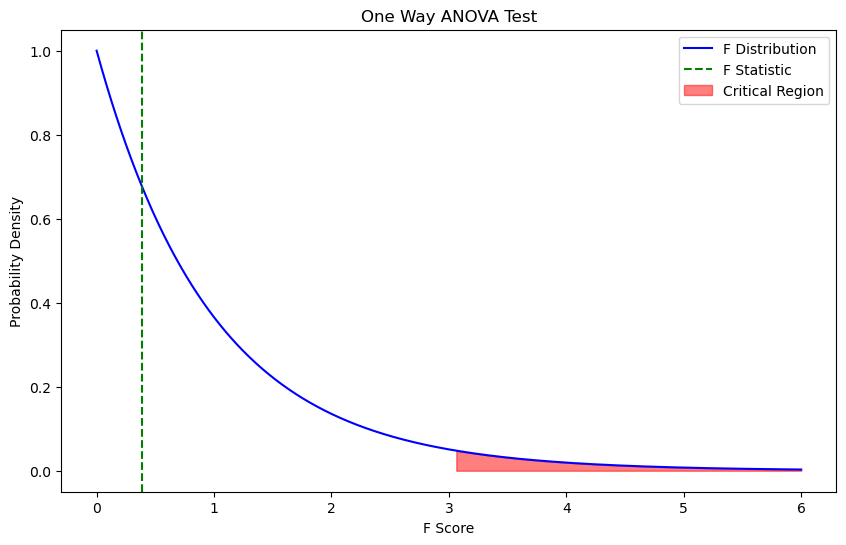

In [6]:
groups = df.groupby('Age_Category')['DiabetesPedigreeFunction'].apply(list)
groups = [random.choices(group, k = 50) for group in groups]
alpha = 0.05
ANOVA(groups, alpha)